In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/usgs_data_small.csv")
df.dropna(inplace=True)
df

,time,longitude,latitude,depth,mag
31,1728-02-08 12:54:00,-70.9790,42.8420,0.000,4.00
146,1843-02-08 16:14:00,-61.1700,16.7300,40.000,8.50
179,1853-09-02 01:24:00,-120.8000,36.2500,10.000,6.30
222,1860-04-17 04:54:00,-120.9500,36.3500,10.000,6.00
225,1860-10-17 12:39:00,-70.1000,47.5000,10.000,6.10
...,...,...,...,...,...
4451672,2023-10-01 01:27:41.780000,-179.0150,51.7300,10.980,1.22
4451673,2023-10-01 01:30:30.046000,152.6996,-4.3429,65.434,4.90
4451674,2023-10-01 01:33:05.281000,-152.6620,60.0999,109.400,1.90
4451675,2023-10-01 01:41:39.645000,-175.3176,51.9028,75.100,2.10


In [3]:
df.shape

(4278833, 5)

In [4]:
df["time"] = df["time"].apply(lambda x: x[:4])
df = df[df["time"] > "1950"]

<Axes: xlabel='time'>

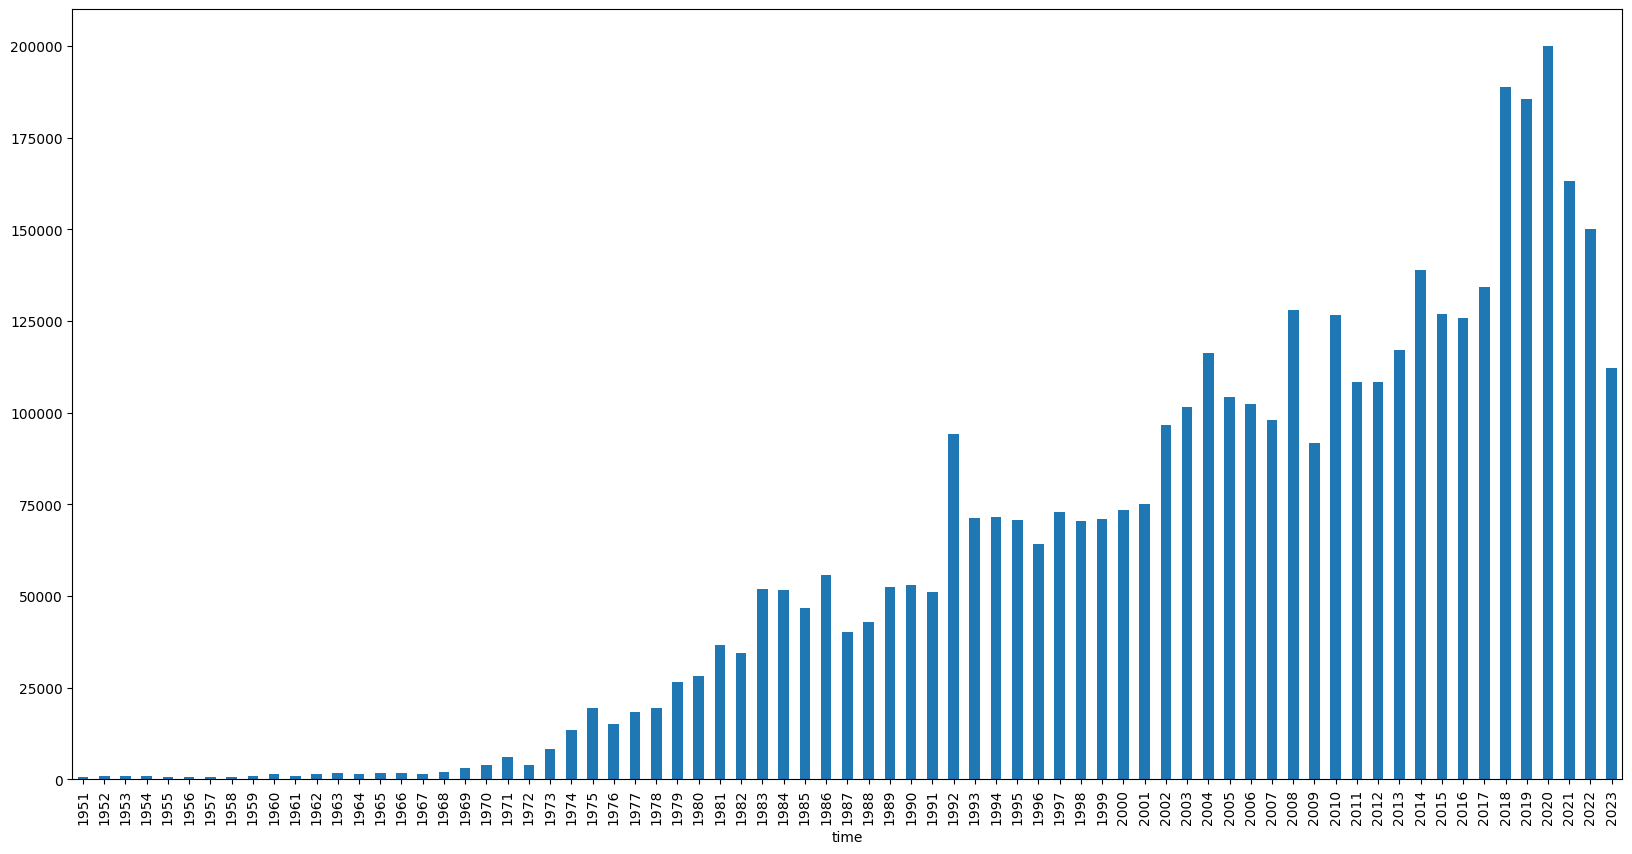

In [5]:
# plot count of earthquakes over time on barplot
df["time"].value_counts().sort_index().plot.bar(figsize=(20, 10))

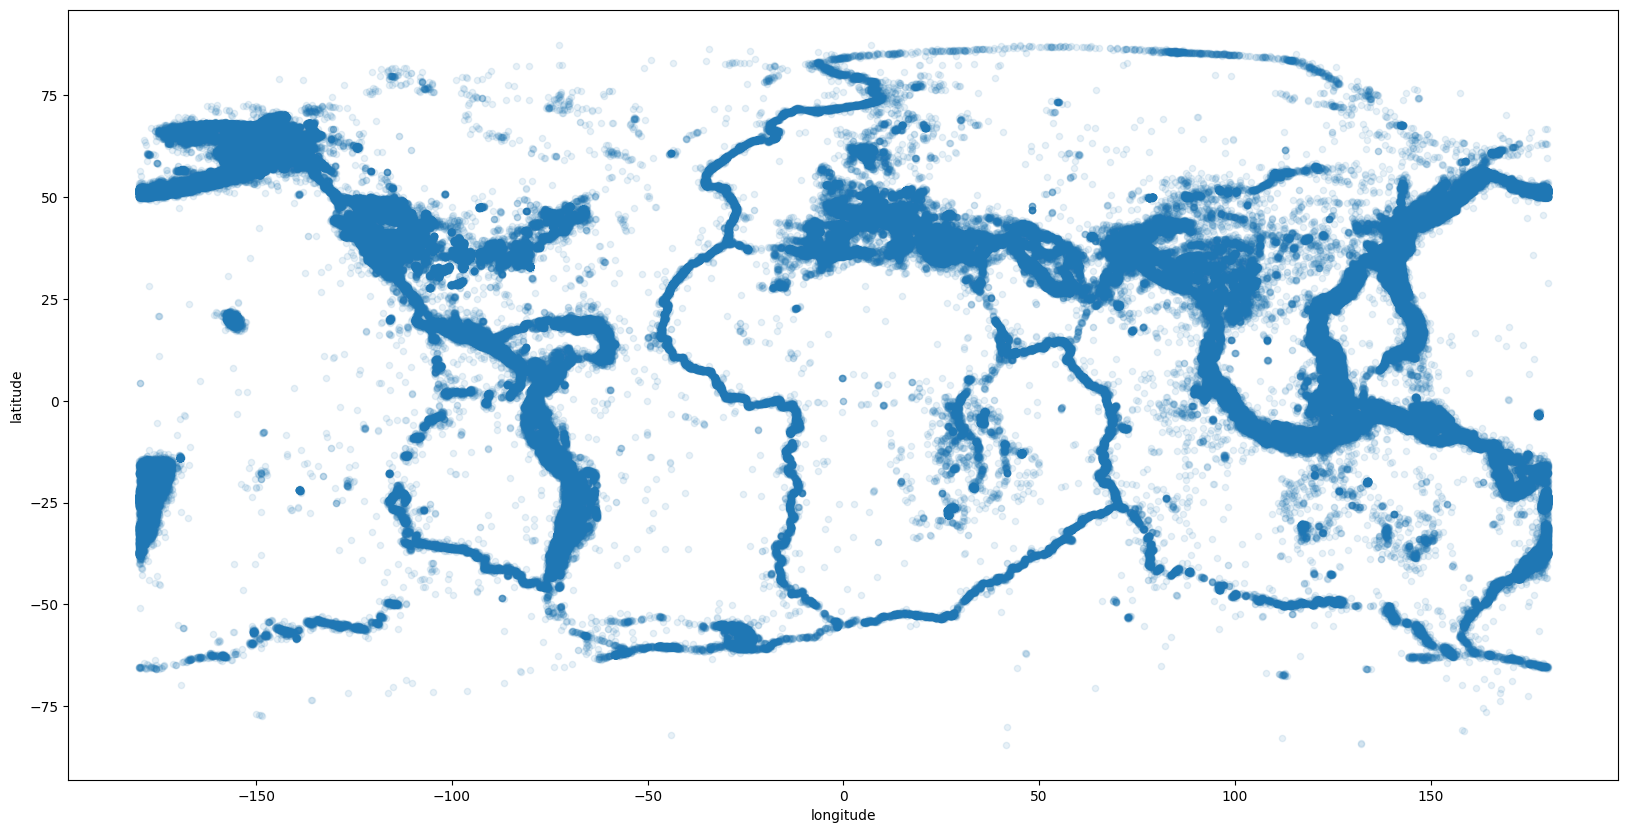

In [6]:
# plot count of earthquakes over longitude and latitude
df.plot.scatter(x="longitude", y="latitude", alpha=0.1, figsize=(20, 10))
plt.show()

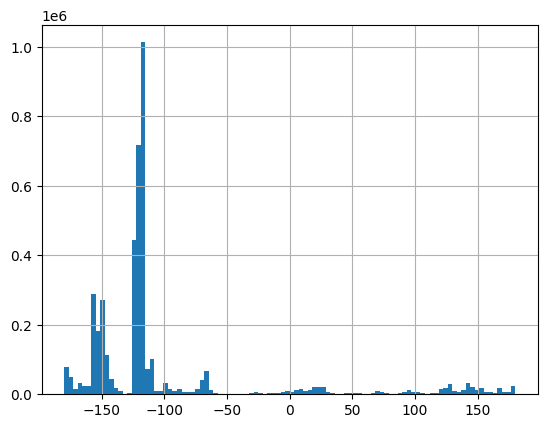

In [7]:
# plot count of earthquakes over longitude
df["longitude"].hist(bins=100)
plt.show()

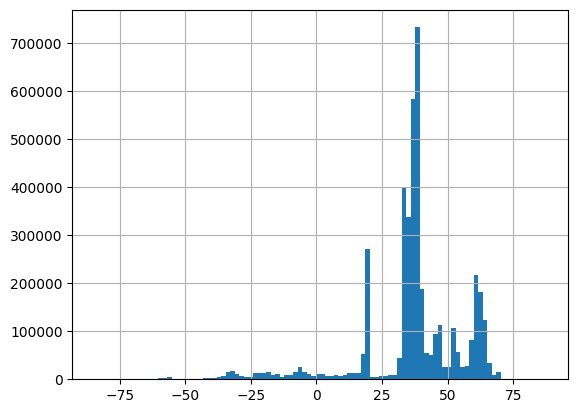

In [8]:
# plot count of earthquakes over latitude
df["latitude"].hist(bins=100)
plt.show()

In [9]:
geo_split = 1

In [10]:
df["latitude"] = df["latitude"] // geo_split
df["latitude"] = df["latitude"] + np.abs(np.min(df["latitude"]))

df["longitude"] = df["longitude"] // geo_split
df["longitude"] = df["longitude"] + np.abs(np.min(df["longitude"]))
df["pos"] = df["latitude"].astype(str) + "_" + df["longitude"].astype(str)

In [11]:
df

,time,longitude,latitude,depth,mag,pos
20956,1951,289.0,132.0,15.000,5.88,132.0_289.0
20958,1951,61.0,122.0,1.000,3.02,122.0_61.0
20959,1951,73.0,102.0,15.000,5.95,102.0_73.0
20960,1951,74.0,102.0,15.000,5.94,102.0_74.0
20961,1951,106.0,46.0,35.000,6.22,46.0_106.0
...,...,...,...,...,...,...
4451672,2023,0.0,136.0,10.980,1.22,136.0_0.0
4451673,2023,332.0,80.0,65.434,4.90,80.0_332.0
4451674,2023,27.0,145.0,109.400,1.90,145.0_27.0
4451675,2023,4.0,136.0,75.100,2.10,136.0_4.0


<Axes: xlabel='time'>

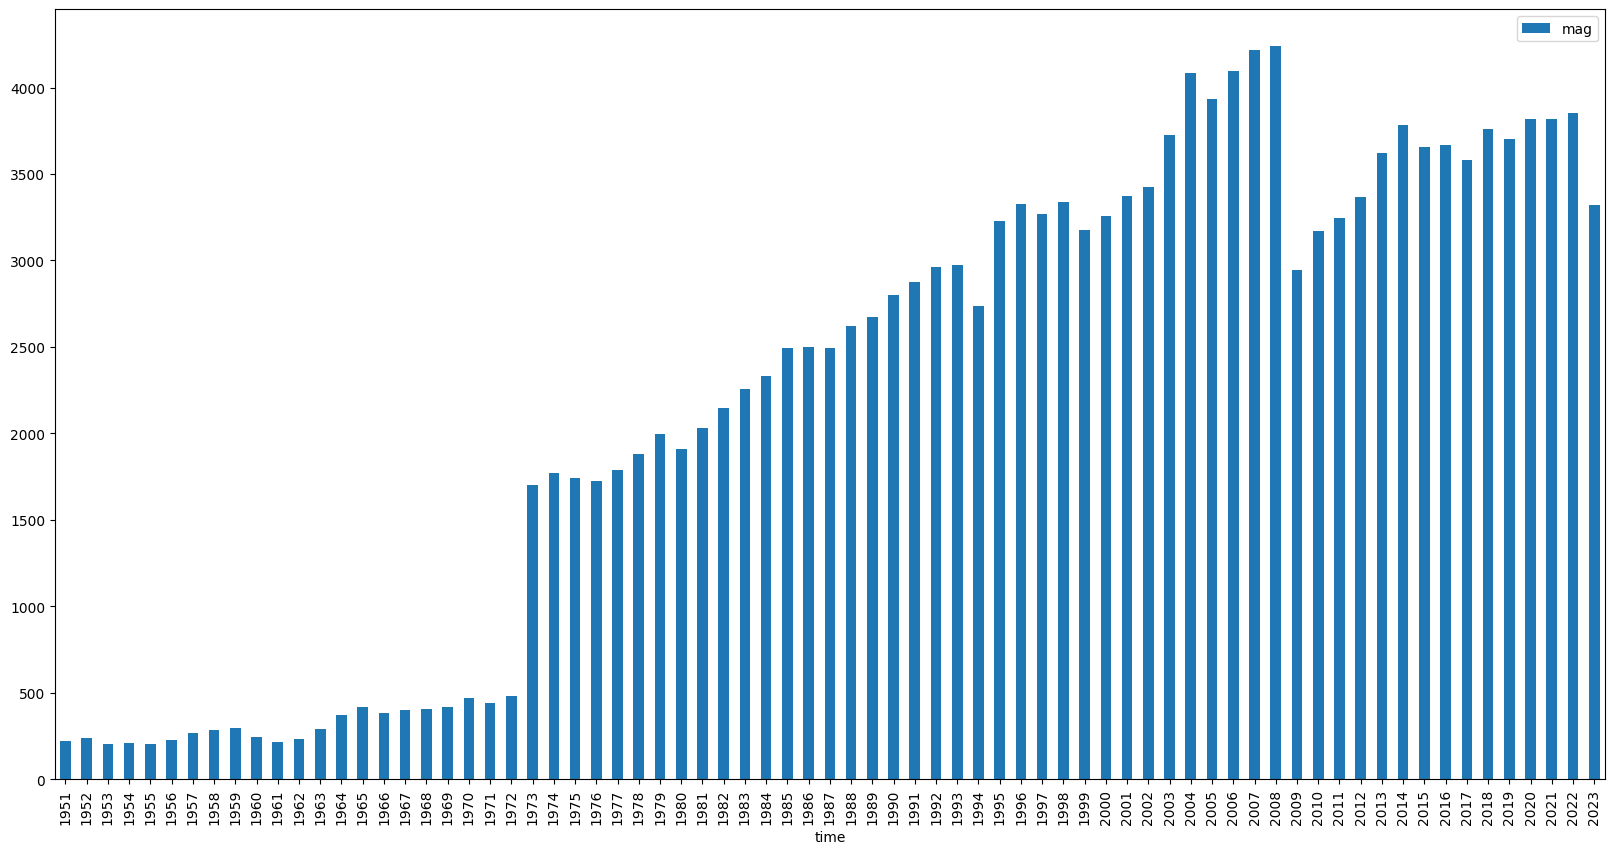

In [12]:
# get number of regions with eq per year
df.groupby(["time", "pos"]).count().reset_index().groupby("time").agg({"mag": "count"}).plot.bar(figsize=(20, 10))

<Axes: xlabel='time'>

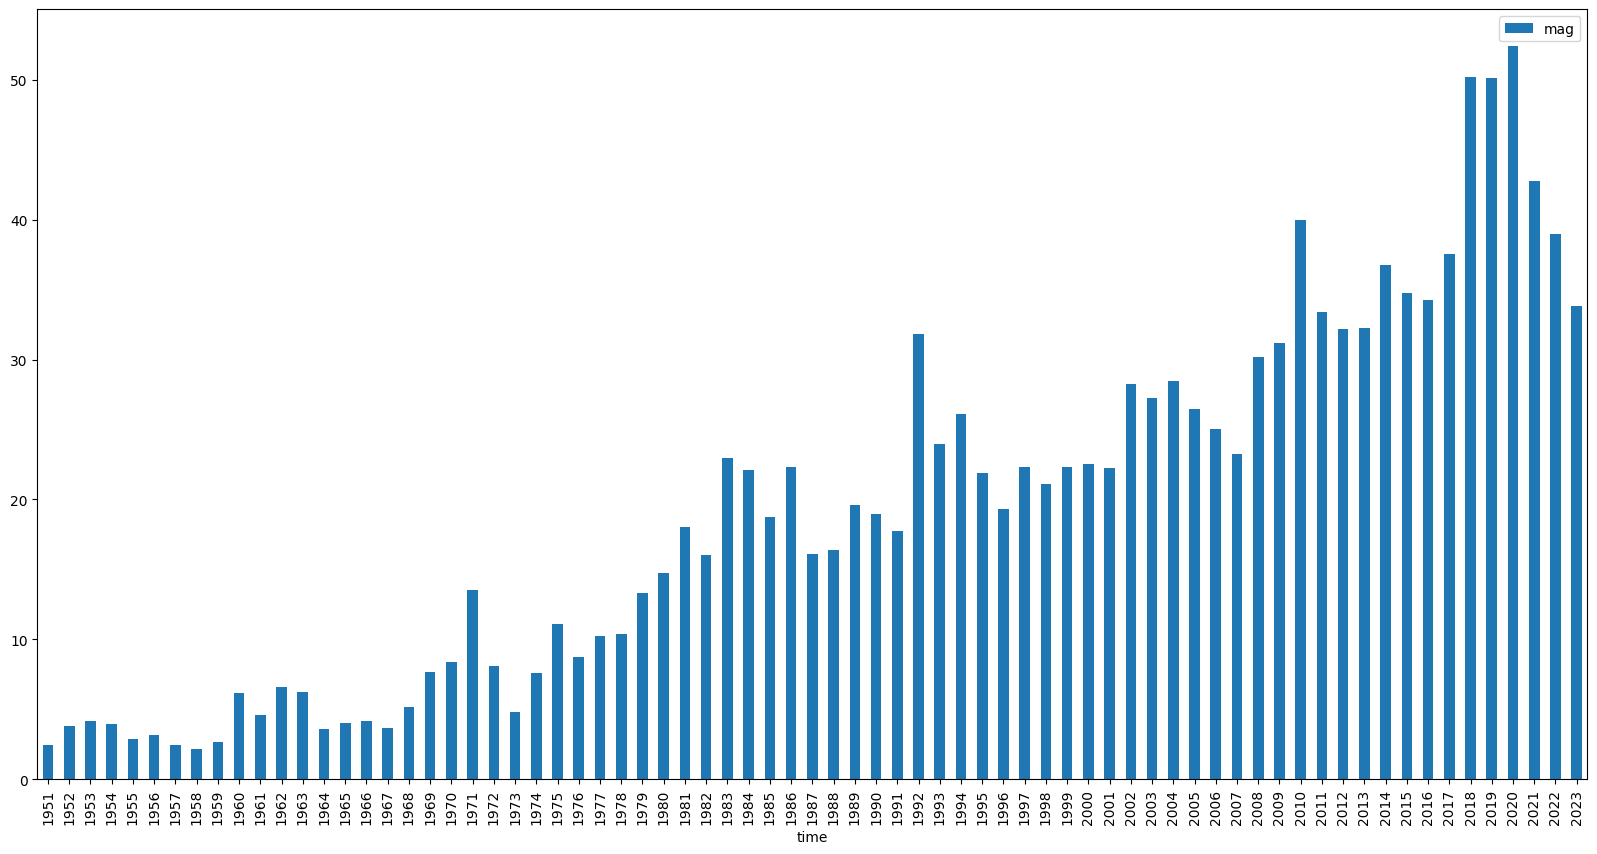

In [13]:
# get average number of earthquakes per region per year
df.groupby(["time", "pos"]).count().reset_index().groupby("time").agg({"mag": "mean"}).plot.bar(figsize=(20, 10))